In this notebook, we want to perform clustering using Silhouette Analysis if there is any pattern or grouping (clusters) that can be found for different pairs of variables.

# Data Extractrion

In [1]:
# importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import calendar
warnings.filterwarnings("ignore")
sb.set()

# importing data
df = pd.read_csv("Highest Holywood Grossing Movies.csv").iloc[:,1:]

# removing null values
df2 = df[df['Release Date'].notna()]

# converting string to datetime
df2['Release Date'] = pd.to_datetime(df2['Release Date'], format='%B %d, %Y')

# Silhouette Analysis

World Sales are chosen since it equates to total sales (Domestic Sales + International Sales)

In [2]:
# extracting the year from the date
df2['Year'] = pd.DatetimeIndex(df2['Release Date']).year

### Clustering of Year of movie released in relation to World Sales

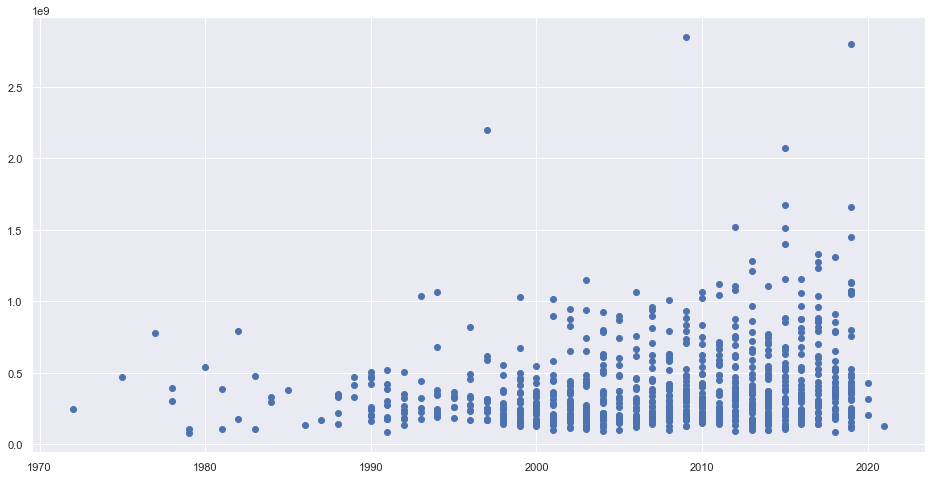

In [3]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Extract the Features from the Data
X2 = pd.DataFrame(df2[["Year", "World Sales (in $)"]])

# Plot the Raw Data on a 2D grid
f = plt.figure(figsize=(16,8))
plt.scatter(x = "Year", y = "World Sales (in $)", data = X2)
plt.show()

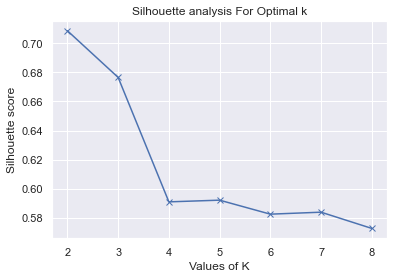

In [4]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X2)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(X2, cluster_labels));
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

Cluster 0:	2006.19	290041020.52	
Cluster 1:	2010.61	923291885.07	

Within Cluster Sum of Squares : 2.7356192120838853e+19



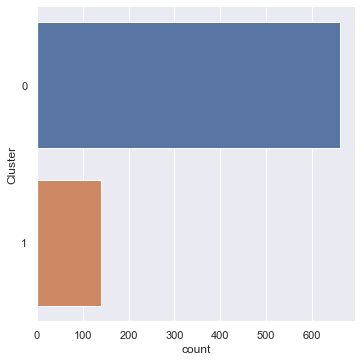

In [5]:
# Set "optimal" Number of Clusters
num_clust = 2

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)                 

# Fit the Clustering Model on the Data
kmeans.fit(X2)

# Print the Cluster Centers
for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X2)

# Append Labels to the Data
X2_labeled = X2.copy()
X2_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.catplot(y = "Cluster", data = X2_labeled, kind = "count")
plt.show()

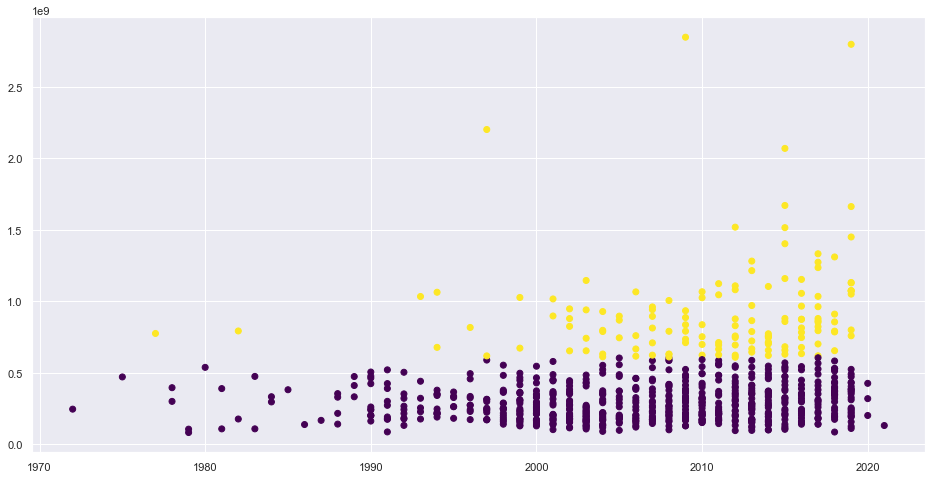

In [6]:
# Visualize the Clusters in the Data
f = plt.figure(figsize=(16,8))
plt.scatter(x = "Year", y = "World Sales (in $)", c = "Cluster", cmap = 'viridis', data = X2_labeled)
plt.show()

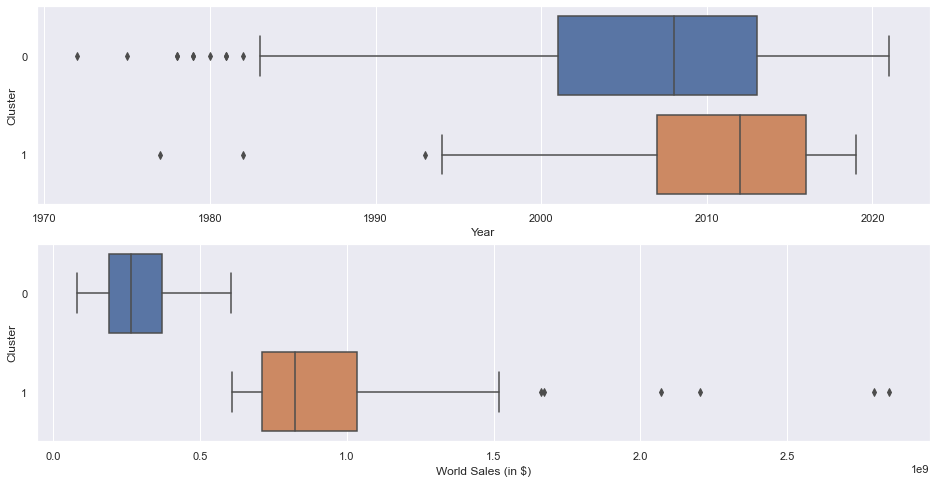

In [7]:
# Boxplots for the Features against the Clusters
f, axes = plt.subplots(2, 1, figsize=(16,8))
sb.boxplot(x = 'Year', y = 'Cluster', data = X2_labeled, ax = axes[0], orient='h')
sb.boxplot(x = 'World Sales (in $)', y = 'Cluster', data = X2_labeled, ax = axes[1], orient='h')
plt.show()

The boxplots for "Year" lie mostly on the right side of the range, indicating that significantly more movies were released in recent times, especially from about the year 2000 onwards. Cluster 0 seems to be more spread out in years with the whisker starting from around 1980s all the way to 2021. On the other hand, Cluster 1 seems to be narrower with the whisker only starting from late 1990s. However, there are still some overlaps in years in between. In general, Cluster 1 has higher median in the value of the year (and therefore in general the movies are more recent) compared to Cluster 0.

In contrast, there is seem to be a clear separation in world sales between the two clusters. Cluster 0 has a significantly lower world sales compared to Cluster 1. 

In conclusion, Cluster 0 indicates a vast range of movies that have low value of world sales while Cluster 1 indicates a specific portion of the more recent movies that have high value of the world sales.
Moreover, it can be observed that world sales tend to increase in recent years, since the movies released under Cluster 1 generally generated greater world sales compared to that of Cluster 0. The exact relation of the year and the world sales can be seen in more details in the later part of the analysis. 

### Clustering of Month of movie released in relation to World Sales

In [8]:
# extracting the month from the date
df2['Month'] = pd.DatetimeIndex(df2['Release Date']).month

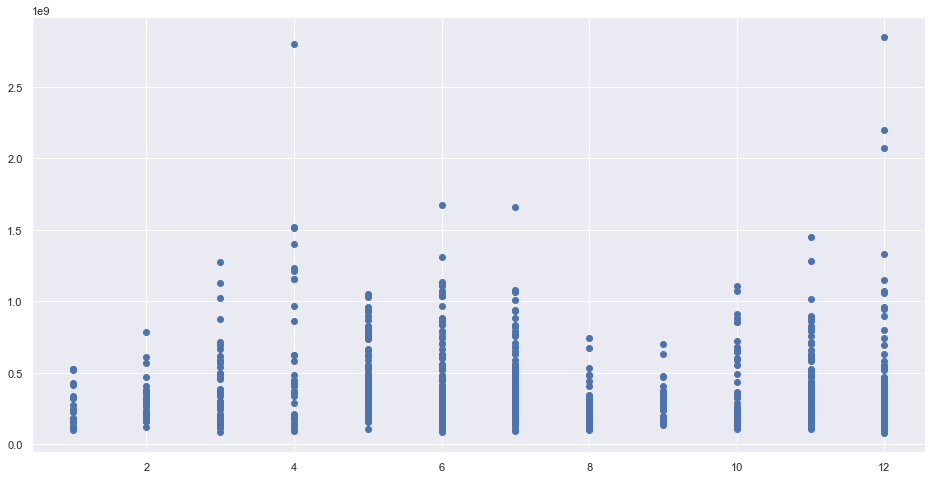

In [9]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Extract the Features from the Data
X3 = pd.DataFrame(df2[["Month", "World Sales (in $)"]])

# Plot the Raw Data on a 2D grid
f = plt.figure(figsize=(16,8))
plt.scatter(x = "Month", y = "World Sales (in $)", data = X3)

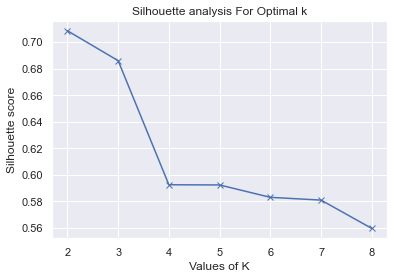

In [10]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X3)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(X3, cluster_labels));
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

Cluster 0:	7.3	290041020.52	
Cluster 1:	7.13	923291885.07	

Within Cluster Sum of Squares : 2.73561921208388e+19



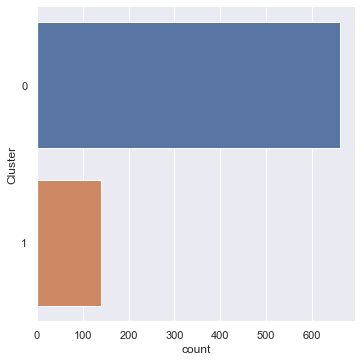

In [11]:
# Set "optimal" Number of Clusters
num_clust = 2

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)                 

# Fit the Clustering Model on the Data
kmeans.fit(X3)

# Print the Cluster Centers
for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X3)

# Append Labels to the Data
X3_labeled = X3.copy()
X3_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.catplot(y = "Cluster", data = X3_labeled, kind = "count")

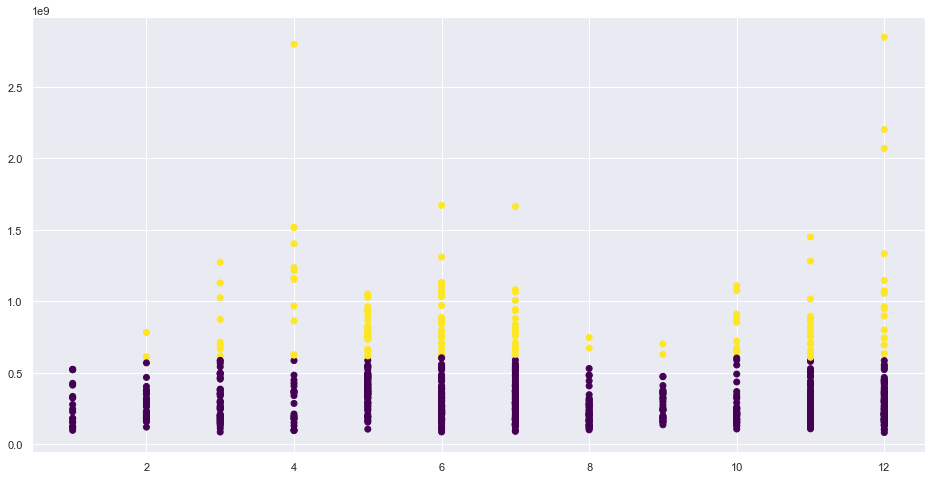

In [12]:
# Visualize the Clusters in the Data
f = plt.figure(figsize=(16,8))
plt.scatter(x = "Month", y = "World Sales (in $)", c = "Cluster", cmap = 'viridis', data = X3_labeled)

<AxesSubplot:xlabel='World Sales (in $)', ylabel='Cluster'>

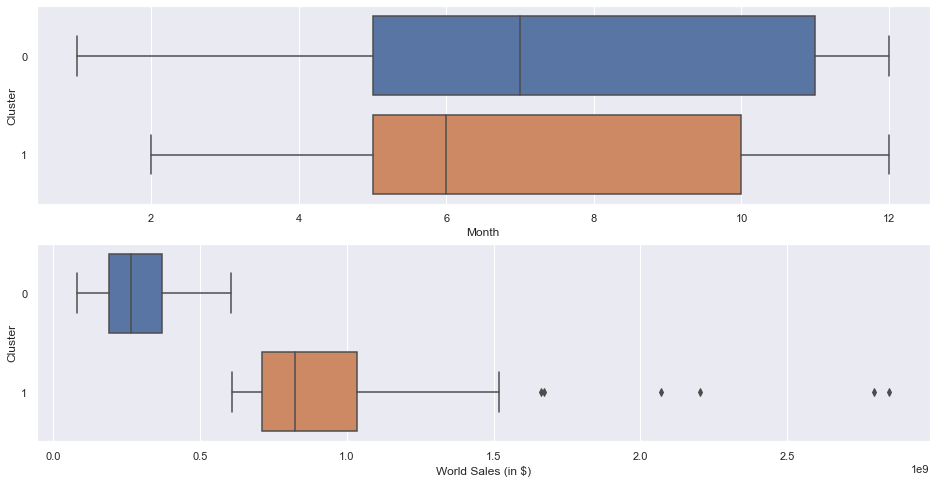

In [13]:
# Boxplots for the Features against the Clusters
f, axes = plt.subplots(2, 1, figsize=(16,8))
sb.boxplot(x = 'Month', y = 'Cluster', data = X3_labeled, ax = axes[0], orient='h')
sb.boxplot(x = 'World Sales (in $)', y = 'Cluster', data = X3_labeled, ax = axes[1], orient='h')

Both clusters seem to have generally similar distribution of the month released, with most movies being released in the second half of the year, resulting in an almost continuous distribution. The boxplots for World Sales however shows a distinct variation. The world sales generated in Cluster 1 is greater than that of Cluster 0. Though the movies were released in about the same period of months, the datapoints in Cluster 1 has distictly greater world sales generated from the movies. This is probably due to the type of movie released. The movies released in the datapoints within Cluster 1 probably have a higher demand and preference among audiences, and hence could have been the reason for the greater world sales. The relationship of the month and the world sales can be seen in more details in the later part of the analysis. 

### Clustering of Runtime(mins) in relation to World Sales

In [14]:
# converting the movie runtime into minutes
df2['Runtime (mins)'] = 0
df2['Runtime (mins)'] += df['Movie Runtime'].apply(lambda x: int(x.split(" hr")[0]))*60
df2.loc[df2['Movie Runtime'].str.contains('min'), 'Runtime (mins)'] += df.loc[df['Movie Runtime'].str.contains("min")]['Movie Runtime'].apply(lambda x: int(x.split("hr ")[1].split(" min")[0]))

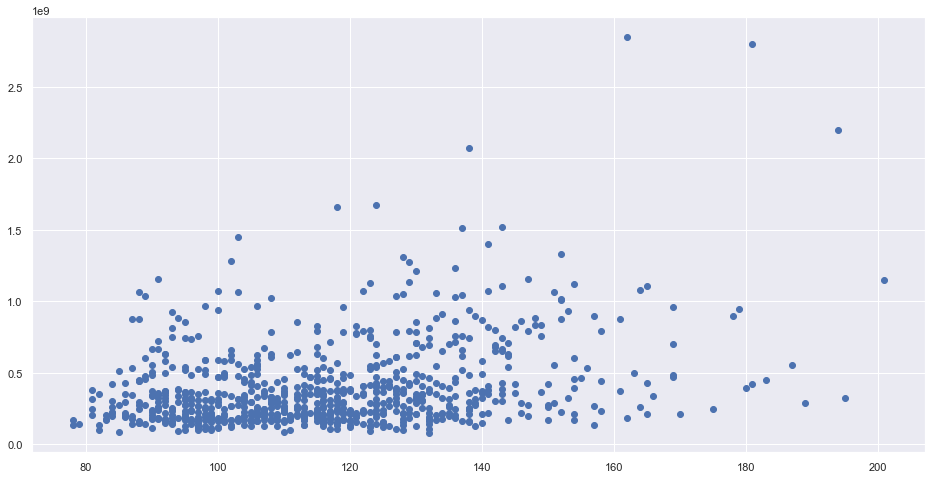

In [15]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Extract the Features from the Data
X1 = pd.DataFrame(df2[["Runtime (mins)", "World Sales (in $)"]])

# Plot the Raw Data on a 2D grid
f = plt.figure(figsize=(16,8))
plt.scatter(x = "Runtime (mins)", y = "World Sales (in $)", data = X1)
plt.show()

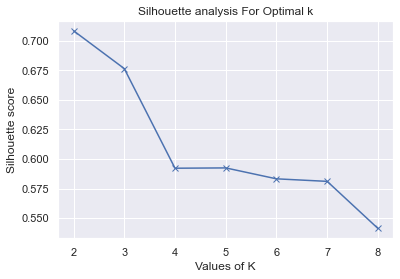

In [16]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X1)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(X1, cluster_labels));
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

Cluster 0:	114.16	290041020.52	
Cluster 1:	128.71	923291885.07	

Within Cluster Sum of Squares : 2.735619212083911e+19



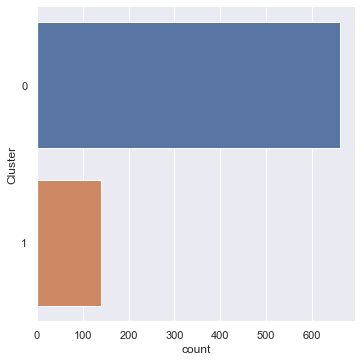

In [17]:
# Set "optimal" Number of Clusters
num_clust = 2

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)                 

# Fit the Clustering Model on the Data
kmeans.fit(X1)

# Print the Cluster Centers
for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X1)

# Append Labels to the Data
X1_labeled = X1.copy()
X1_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.catplot(y = "Cluster", data = X1_labeled, kind = "count")
plt.show()

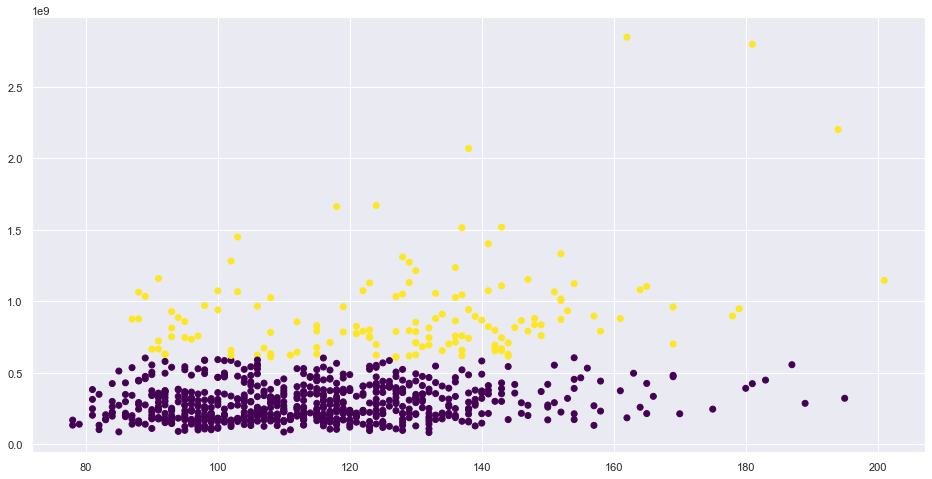

In [18]:
# Visualize the Clusters in the Data
f = plt.figure(figsize=(16,8))
plt.scatter(x = "Runtime (mins)", y = "World Sales (in $)", c = "Cluster", cmap = 'viridis', data = X1_labeled)
plt.show()

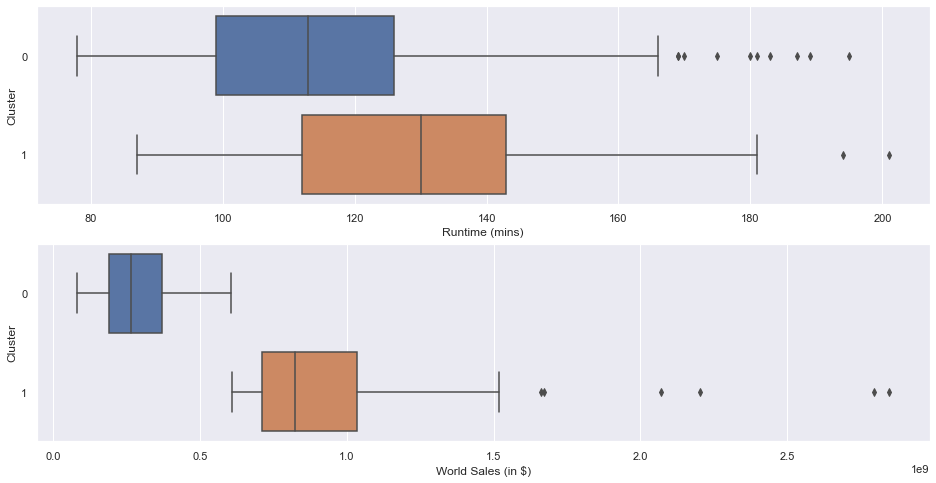

In [19]:
# Boxplots for the Features against the Clusters
f, axes = plt.subplots(2, 1, figsize=(16,8))
sb.boxplot(x = 'Runtime (mins)', y = 'Cluster', data = X1_labeled, ax = axes[0], orient='h')
sb.boxplot(x = 'World Sales (in $)', y = 'Cluster', data = X1_labeled, ax = axes[1], orient='h')
plt.show()

The median runtime for Cluster 1 is greater than that of Cluster 0, and the world sales for Cluster 1 is also greater than that of Cluster 0. Hence, the boxplots show that there are two different clusters:
- Cluster 1: movies with longer runtime and higher world sales
- Cluster 0: movies with shorter runtime and lower world sales

The exact relation of the movie runtime and the world sales can be seen in more details in the later part of the analysis. 